# CHALLENGE 3

### Fetal Health Classification
Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

In [46]:
import numpy as np 
import pandas as pd

In [47]:
df_fetal = pd.read_csv("Documents/Studi Cases/Fetal Health/fetal_health.csv")
df_fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [48]:
df_fetal.isnull().values.any()

False

In [49]:
df_fetal.shape

(2126, 22)

In [50]:
df_fetal.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [51]:
df_fetal["fetal_health"] = df_fetal["fetal_health"].astype('int')
df_fetal.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

## 1. Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

### Pre-processing

Menyiapkan data yang dibutuhkan

In [52]:
df_fetal = df_fetal[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability","fetal_health"]]
df_fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1


Menentukan Predictor atau Independent Variabel X

In [53]:
X = df_fetal[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability"]].values
X[0:5]

array([[1.20e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 7.30e+01, 5.00e-01, 4.30e+01, 2.40e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, 6.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.70e+01, 2.10e+00, 0.00e+00, 1.04e+01],
       [1.33e+02, 3.00e-03, 0.00e+00, 8.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.60e+01, 2.10e+00, 0.00e+00, 1.34e+01],
       [1.34e+02, 3.00e-03, 0.00e+00, 8.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.60e+01, 2.40e+00, 0.00e+00, 2.30e+01],
       [1.32e+02, 7.00e-03, 0.00e+00, 8.00e-03, 0.00e+00, 0.00e+00,
        0.00e+00, 1.60e+01, 2.40e+00, 0.00e+00, 1.99e+01]])

Menentukan Target atau Dependent Variabel Y

In [54]:
y = df_fetal["fetal_health"]
y[0:5]

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int32

Melakukan split pada df_fetal dimana trainning set=80% dan test set=20%

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Modeling Decision Tree
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=None)
drugTree

DecisionTreeClassifier(criterion='entropy')

In [59]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [60]:
predTree = drugTree.predict(X_test)
print (predTree [0:10])
print (y_test [0:10])

[3 1 1 1 1 1 1 1 1 1]
1708    3
76      2
1266    1
943     1
501     1
935     1
1723    1
1931    1
787     1
1888    1
Name: fetal_health, dtype: int32


Hasil Prediksi Fetal Health Dalam Bentuk Data Frame

In [61]:
data_test = pd.DataFrame(X_test,columns=["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability"])

In [62]:
data_test["fetal_health"] = predTree
data_test.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,131.0,0.000,0.003,0.003,0.008,0.0,0.003,67.0,1.7,0.0,0.0,3
1,150.0,0.000,0.000,0.003,0.000,0.0,0.000,61.0,0.9,3.0,8.7,1
2,119.0,0.003,0.000,0.006,0.000,0.0,0.000,25.0,1.3,0.0,13.8,1
3,136.0,0.002,0.000,0.002,0.000,0.0,0.000,54.0,0.5,8.0,9.5,1
4,131.0,0.015,0.017,0.001,0.000,0.0,0.000,31.0,3.2,0.0,7.1,1
5,126.0,0.003,0.000,0.005,0.001,0.0,0.000,30.0,1.2,0.0,10.8,1
6,134.0,0.005,0.001,0.006,0.004,0.0,0.000,53.0,1.8,0.0,0.9,1
7,133.0,0.000,0.001,0.009,0.005,0.0,0.000,58.0,2.6,0.0,1.2,1
8,123.0,0.003,0.003,0.000,0.000,0.0,0.000,52.0,0.8,2.0,15.4,1
9,141.0,0.004,0.000,0.008,0.000,0.0,0.000,58.0,0.6,1.0,8.5,1


### Model Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model using Jaccard Score.

In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
predTreetrain = drugTree.predict(X_train)
print("DecisionTrees's Trainning Accuracy: ", metrics.accuracy_score(y_train, predTreetrain))
print("DecisionTrees's Test Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Trainning Accuracy:  0.9988235294117647
DecisionTrees's Test Accuracy:  0.92018779342723


In [64]:
df_fetal["fetal_health"] = df_fetal["fetal_health"].astype('str')

In [65]:
df_fetal["fetal_health"].replace("1","Normal",inplace=True)
df_fetal["fetal_health"].replace("2","Suspect",inplace=True)
df_fetal["fetal_health"].replace("3","Pathological",inplace=True)
df_fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,Normal


In [66]:
y_train = y_train.astype('str')
y_train.replace("1","Normal",inplace=True)
y_train.replace("2","Suspect",inplace=True)
y_train.replace("3","Pathological",inplace=True)

Plotting Grafik Decision Tree

In [67]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

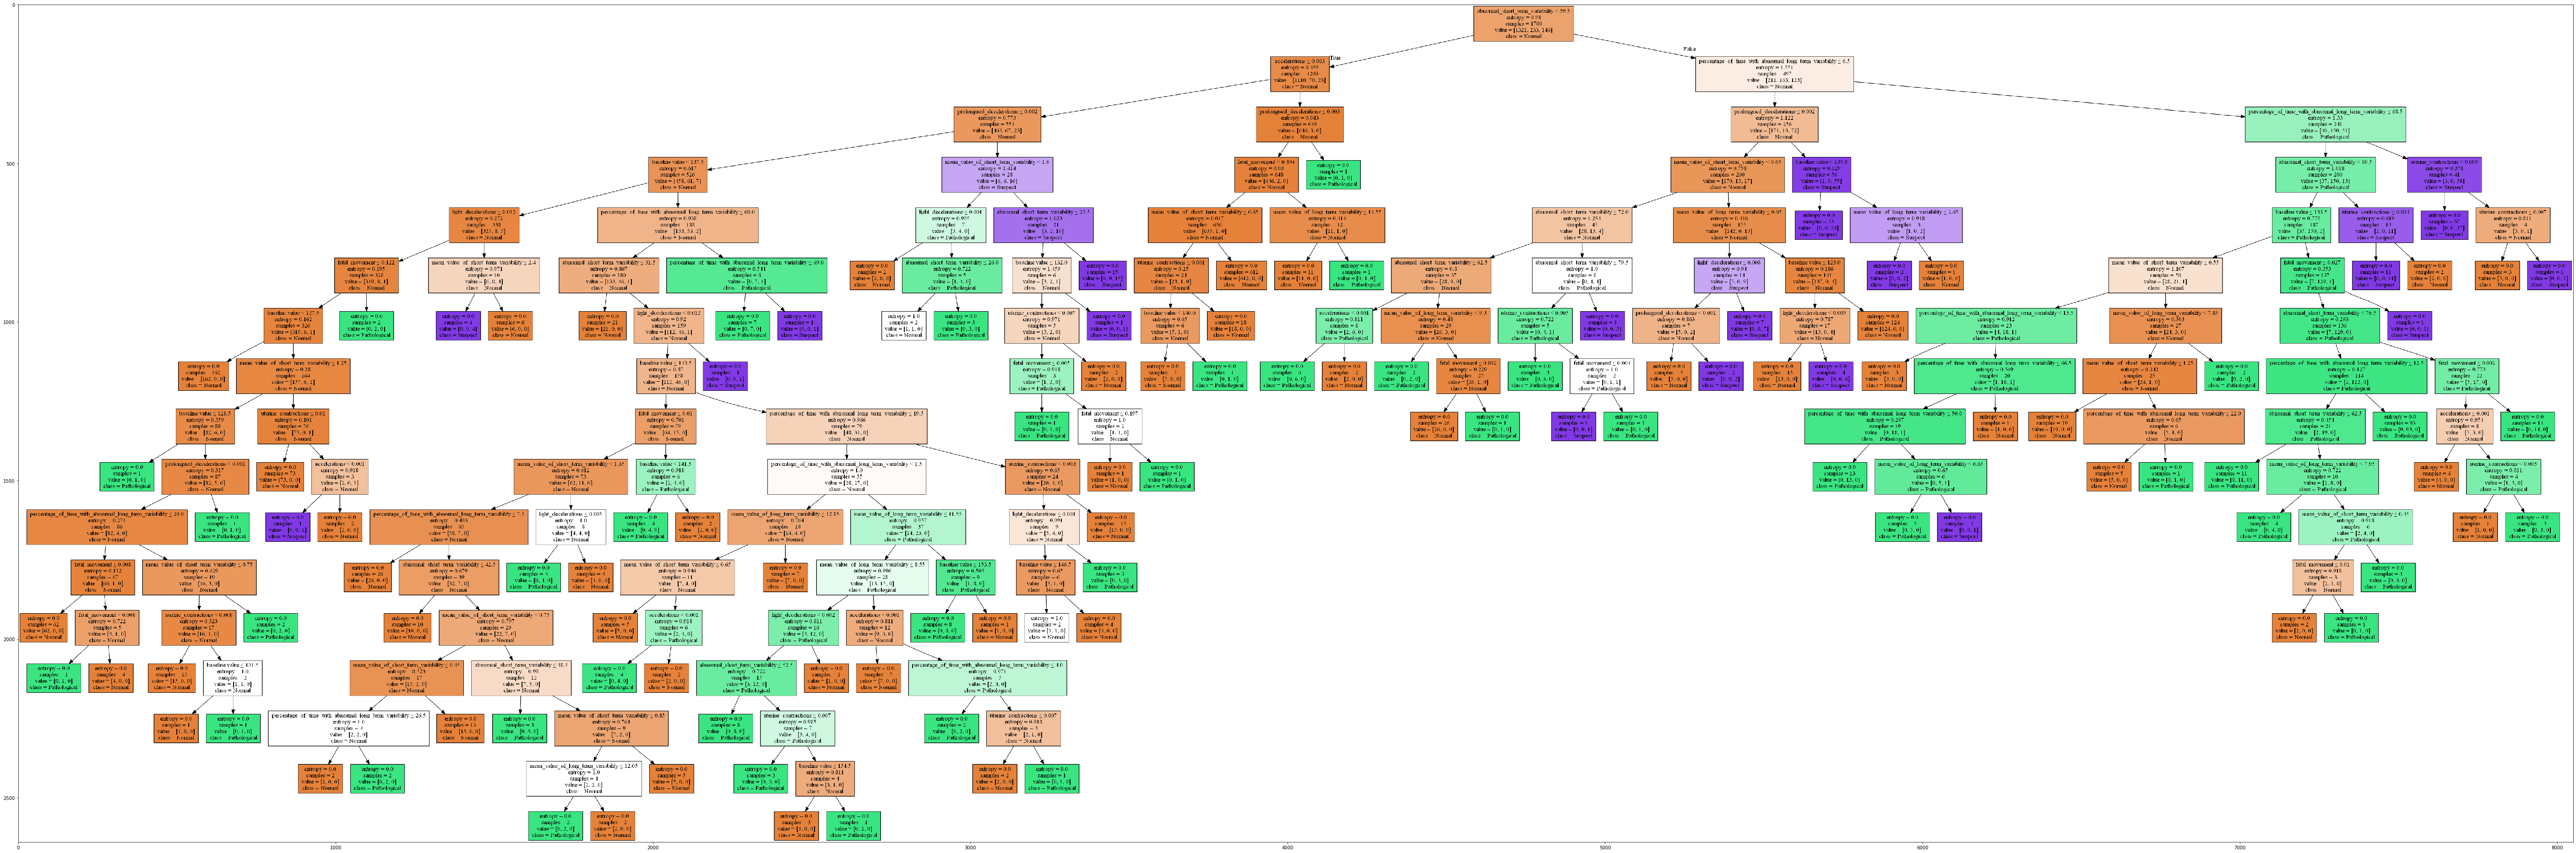

In [68]:
dot_data = StringIO()
print(StringIO())
filename = "drugtree.png"
featureNames = df_fetal.columns[0:11]
targetNames = df_fetal["fetal_health"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Plotting Grafik Confusion Matrix

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.97      0.93      0.95       334
           2       0.70      0.85      0.77        62
           3       0.96      0.90      0.93        30

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.88       426
weighted avg       0.93      0.92      0.92       426

Confusion matrix, without normalization
[[312  21   1]
 [  9  53   0]
 [  1   2  27]]


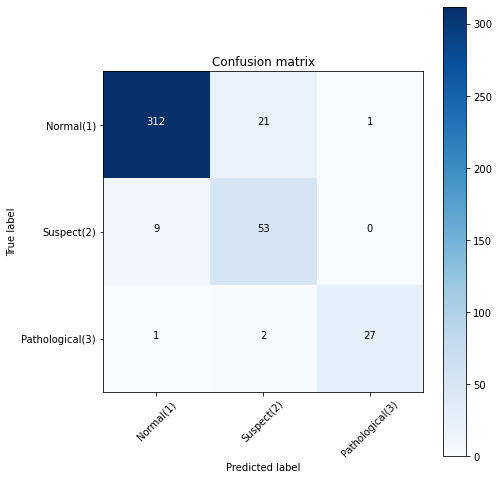

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree)
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=['Normal(1)','Suspect(2)','Pathological(3)'],normalize= False,  title='Confusion matrix')

## 2. Setting up the K- Nearest Neighbor
We will be using <b>train/test split</b> on our <b>K- Nearest Neighbor</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

### Pre-processing

Menyiapkan data yang dibutuhkan

In [72]:
df_fetal = df_fetal[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability","fetal_health"]]
df_fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,Normal


In [73]:
df_fetal["fetal_health"].replace("Normal","1",inplace=True)
df_fetal["fetal_health"].replace("Suspect","2",inplace=True)
df_fetal["fetal_health"].replace("Pathological","3",inplace=True)
df_fetal["fetal_health"] = df_fetal["fetal_health"].astype('int')

Menentukan Predictor atau Independent Variabel X

In [74]:
X = df_fetal[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability"]].values
X[0:5]

array([[1.20e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 7.30e+01, 5.00e-01, 4.30e+01, 2.40e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, 6.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.70e+01, 2.10e+00, 0.00e+00, 1.04e+01],
       [1.33e+02, 3.00e-03, 0.00e+00, 8.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.60e+01, 2.10e+00, 0.00e+00, 1.34e+01],
       [1.34e+02, 3.00e-03, 0.00e+00, 8.00e-03, 3.00e-03, 0.00e+00,
        0.00e+00, 1.60e+01, 2.40e+00, 0.00e+00, 2.30e+01],
       [1.32e+02, 7.00e-03, 0.00e+00, 8.00e-03, 0.00e+00, 0.00e+00,
        0.00e+00, 1.60e+01, 2.40e+00, 0.00e+00, 1.99e+01]])

Menentukan Target atau Dependent Variabel Y

In [75]:
y = df_fetal["fetal_health"]
y[0:5]

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int32

### Normalize Data Z-Score
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [76]:
from sklearn import preprocessing

In [77]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.35, -0.82, -0.2 , -1.48, -0.64, -0.06, -0.27,  1.51, -0.94,
         1.8 , -1.03],
       [-0.13,  0.73, -0.2 ,  0.55,  0.38, -0.06, -0.27, -1.74,  0.87,
        -0.54,  0.39],
       [-0.03, -0.05, -0.2 ,  1.23,  0.38, -0.06, -0.27, -1.8 ,  0.87,
        -0.54,  0.93],
       [ 0.07, -0.05, -0.2 ,  1.23,  0.38, -0.06, -0.27, -1.8 ,  1.21,
        -0.54,  2.63],
       [-0.13,  0.99, -0.2 ,  1.23, -0.64, -0.06, -0.27, -1.8 ,  1.21,
        -0.54,  2.08]])

### Split Data to Trainning Set and Test Set
Melakukan split pada df_fetal dimana trainning set=80% dan test set=20%

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1700, 11) (1700,)
Test set: (426, 11) (426,)


### Modeling KNN
We will first create an instance of the <b>KNN</b></b>.<br>

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

### Predicting
we can use the model to predict the test set:

In [81]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 2, 1, 1, 1])

Hasil Prediksi Fetal Health Dalam Bentuk Data Frame

In [82]:
data_test = pd.DataFrame(X_test,columns=["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability"])

In [83]:
data_test["fetal_health"] = yhat
data_test.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,-0.234167,-0.822388,-0.138908,-0.463919,2.064711,-0.057476,4.817640,1.164125,0.415857,-0.535361,-1.455081,3
1,1.697016,-0.822388,-0.203210,-0.463919,-0.638438,-0.057476,-0.268754,0.815060,-0.490111,-0.372252,0.091057,2
2,-1.453861,-0.046128,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,-1.279331,-0.037127,-0.535361,0.997414,1
3,0.274039,-0.304881,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,0.407817,-0.943095,-0.100403,0.233231,1
4,-0.234167,3.058914,0.161168,-1.142949,-0.638438,-0.057476,-0.268754,-0.930266,2.114546,-0.535361,-0.193290,1
5,-0.742373,-0.046128,-0.203210,0.215111,-0.300544,-0.057476,-0.268754,-0.988443,-0.150373,-0.535361,0.464263,1
6,0.070757,0.471379,-0.181776,0.554627,0.713136,-0.057476,-0.268754,0.349640,0.529103,-0.535361,-1.295136,1
7,-0.030884,-0.822388,-0.181776,1.573172,1.051030,-0.057476,-0.268754,0.640527,1.435070,-0.535361,-1.241821,1
8,-1.047296,-0.046128,-0.138908,-1.482465,-0.638438,-0.057476,-0.268754,0.291462,-0.603357,-0.426622,1.281761,1
9,0.782245,0.212626,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,0.640527,-0.829849,-0.480991,0.055514,1


### Model Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model using Jaccard Score.

In [84]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9582352941176471
Test set Accuracy:  0.9225352112676056


Plotting Line Chart Nilai K Terhadap Accuracy

In [85]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.92, 0.91, 0.92, 0.92, 0.91, 0.9 , 0.9 , 0.89, 0.9 ])

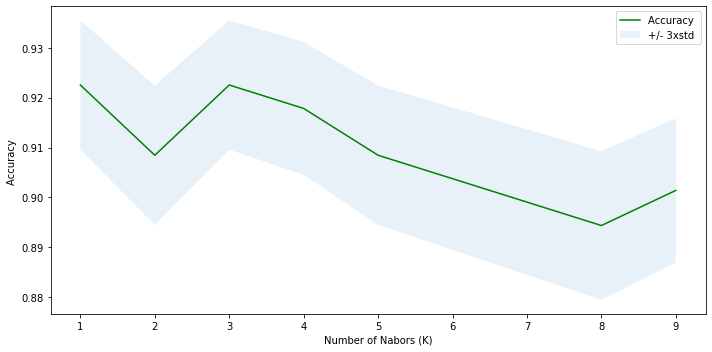

In [86]:
plt.figure(figsize=(10,5))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [87]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9225352112676056 with k= 1


Plotting Grafik Confusion Matrix

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.93      0.96      0.95       334
           2       0.76      0.66      0.71        62
           3       0.81      0.70      0.75        30

    accuracy                           0.90       426
   macro avg       0.83      0.78      0.80       426
weighted avg       0.90      0.90      0.90       426

Confusion matrix, without normalization
[[322  10   2]
 [ 18  41   3]
 [  6   3  21]]


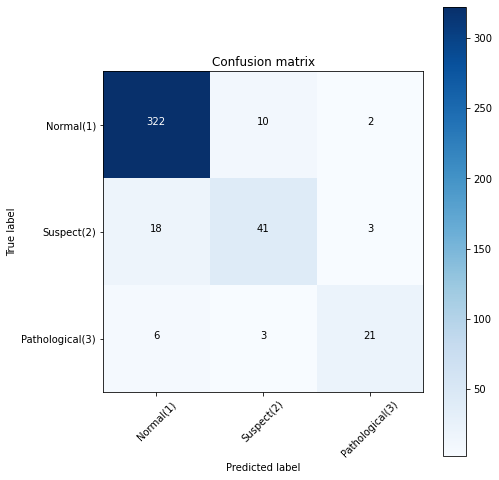

In [90]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=['Normal(1)','Suspect(2)','Pathological(3)'],normalize= False,  title='Confusion matrix')